In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # 3D array:1,797 samples of 8 × 8 grid of pixels 
# each element is an integer in the range of 0..16

(1797, 8, 8)

In [24]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [67]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [64]:
digits.data[0].shape

(64,)

In [59]:
digits.data[1796]

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

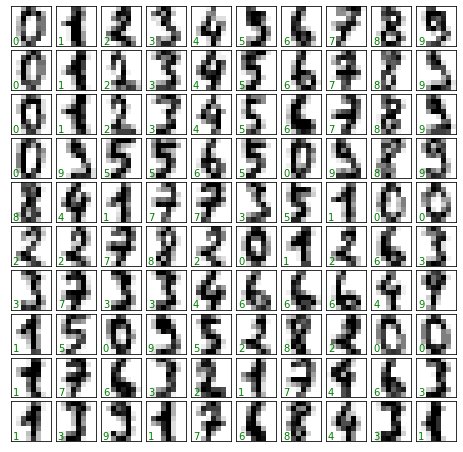

In [57]:
# visualize some samples
import matplotlib.pyplot as plt 

# create a 2D 10*10 framework (8*8) of 0.1*0.1 squares for the digits to be placed in
# axes is a numpy 2D 10*10 array of axes
fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))  

for i, ax in enumerate(axes.flat):  # ndarray.flat is a 1-D iterator over the array to avoid naive iteration over rows and column separately 
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')  # place texts of images

# Data preparation to work within Scikit-Learn
### Arrange data into a features matrix [[n_samples, n_features]] and target vector

In [22]:
# treat each pixel in the image as a feature by flattening out the 8*8 pixel arrays  
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

# Unsupervised learning: Dimensionality reduction

In [27]:
# Reduce dimensions to 2 as it is hard to visualize in the 64-dimensional parameter space
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data) # transform the data to two dimensions
data_projected.shape

(1797, 2)

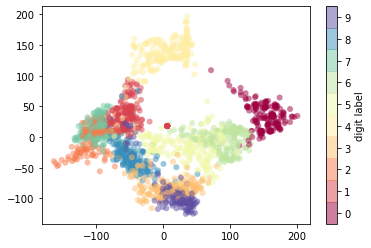

In [31]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolors='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

# Classification on digits

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [39]:
Xtrain.shape

(1347, 64)

In [40]:
Xtest.shape

(450, 64)

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

# Where are the mis-labeled points?
## Use heat map to visualize how value of each digit was predicted. For example, 0 always was predicted 0; 1 was predicted 4 times as 8; 2 was predicted 7 times as 1, 2 times as 3 and 15! times as 8,...  

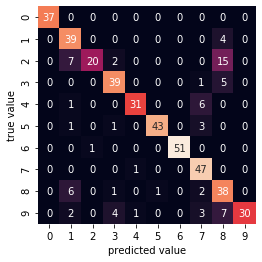

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Visualize inputs with their predicted labels 

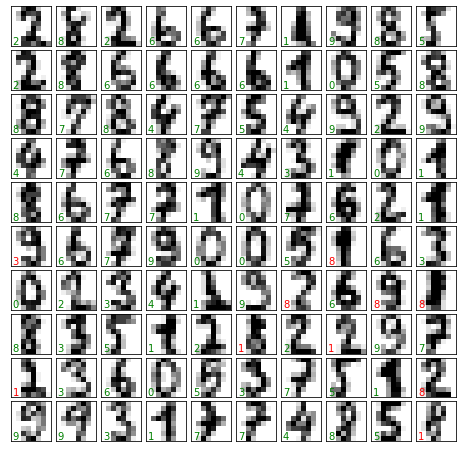

In [65]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')